<a href="https://colab.research.google.com/github/LiamJWong/Datasets/blob/master/lab1-binary-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab1: Binary image classifier

## 1. Setup
Install fastbook and setup Google drive connection.

In [17]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Import necessary libraries

In [18]:
from fastbook import *

## 2. Download images 
Use Azure image search or DuckDuckGo to download 150 images of each class. Save images to Google drive.

### 2.1 Try it out
Similar to the lecture notebook, try out your query and plot a few of the resulting images to verify that your search returns sensible images.

In [19]:
urls = search_images_ddg('spoon', max_images=150)
len(urls),urls[0]

(150, 'http://gricefostereventhire.co.uk/wp-content/uploads/2015/06/spoon.jpg')

In [20]:
urls_forks = search_images_ddg('fork', max_images=150)
len(urls_forks),urls_forks[0]

(150,
 'http://1.bp.blogspot.com/-DMvUUkiVrfk/T-Nw9mwveLI/AAAAAAAAAQ8/TAj3AzFdfzI/s1600/modern-two-pronged-fork.jpg')

0: http://gricefostereventhire.co.uk/wp-content/uploads/2015/06/spoon.jpg
403 Client Error: Forbidden for url: http://gricefostereventhire.co.uk/wp-content/uploads/2015/06/spoon.jpg
1: http://www.benefits-of-honey.com/image-files/buy-pine-spoons-pair.jpg
2: https://static.pexels.com/photos/40561/teaspoon-coffee-spoon-metal-eat-40561.jpeg
3: https://cdn.shopify.com/s/files/1/0206/2524/products/Half-spoon-jonathan-aspinall-whod-have-thought_300dpi.jpg?v=1393207754
4: https://www.chapelcards.co.uk/images/shop/at-home/IMG_1439.jpg
5: https://i5.walmartimages.com/asr/a0eb06ec-a269-4f60-935a-dafb142ee772.b8953181690023a7ecf9f8b48f7313f1.jpeg
6: https://www.survivalresources.com/images/product/ToaksLongHandleSpoon.Store.jpg
7: https://i.pinimg.com/originals/a4/06/d0/a406d0a7bdd3eb1c087dfecf1b902e02.jpg
8: https://images.all-free-download.com/images/graphiclarge/fork_and_spoon_213344.jpg
9: https://img.thrfun.com/img/091/514/plastic_spoon_x1.jpg
10: https://i.redd.it/i3t007xdmwa11.jpg
11: http

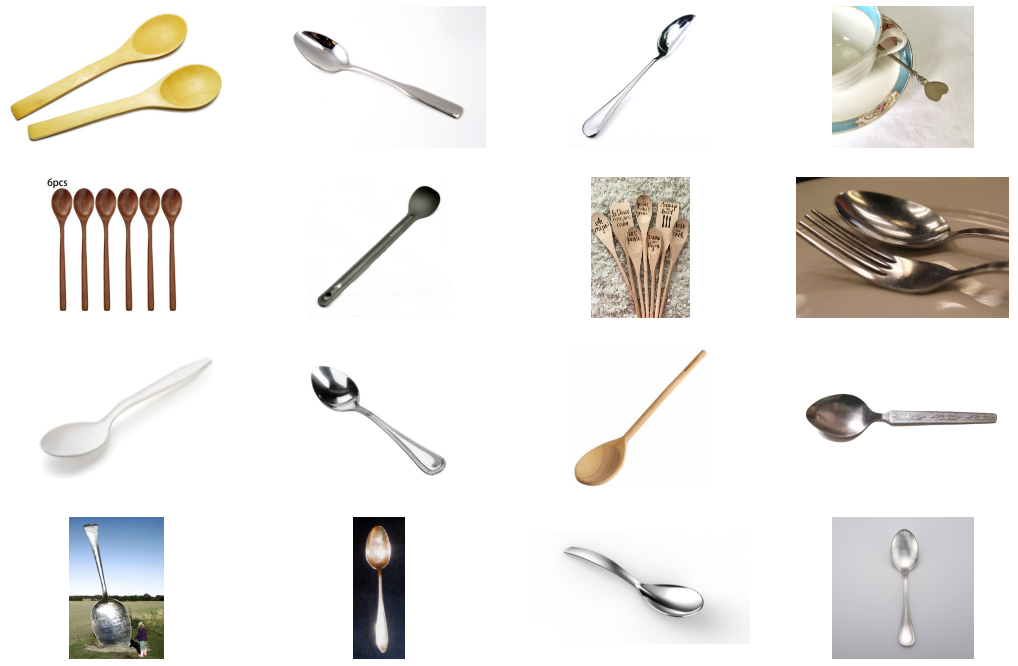

In [21]:
f, axes = plt.subplots(4, 4, figsize=(18,12))
axes = axes.flatten()
ax_i = 0
img_i = 0
while ax_i < len(axes) and img_i < len(urls):
  try:
    url = urls[img_i]
    print(f'{img_i}: {url}')
    image_data = requests.get(url)
    image_data.raise_for_status()
    
    image = Image.open(BytesIO(image_data.content)) 
    axes[ax_i].imshow(image)
    axes[ax_i].axis("off")
    ax_i += 1 # next axis
  except requests.exceptions.RequestException as e:
    print(e)
  finally:
    img_i += 1 # next image, especially when exception occured

      
plt.show()

0: http://1.bp.blogspot.com/-DMvUUkiVrfk/T-Nw9mwveLI/AAAAAAAAAQ8/TAj3AzFdfzI/s1600/modern-two-pronged-fork.jpg
1: http://i.c-b.co/is/image/Crate/DinnerForksS4S9/$web_zoom$&/1402041453/four-piece-dinner-fork-set.jpg
2: https://thorns.co.uk/wp-content/uploads/2019/10/C0676-Jesmond-Dessert-Fork.png
3: http://clipart-library.com/images_k/fork-transparent/fork-transparent-6.png
4: https://st.hzcdn.com/simgs/1e313480054260b2_4-3526/transitional-forks.jpg
5: https://clipground.com/images/silver-fork-clipart-1.jpg
6: http://clipart-library.com/images/6irokKLXT.png
7: https://www.goodfreephotos.com/albums/other-photos/fork-image.jpg
8: https://mdpocket.com/image/catalog/Pocket_Equipment/Tuning_Fork/TuningFork.jpg
9: https://cbsnews1.cbsistatic.com/hub/i/2012/11/27/29183189-a645-11e2-a3f0-029118418759/fork.jpg
10: https://cliparting.com/wp-content/uploads/2017/04/Fork-clipart-free-clip-art-of-9-clipartwork.jpeg
11: https://www.ktfscooters.co.uk/wp-content/uploads/2016/07/fork.jpg
12: http://4.bp

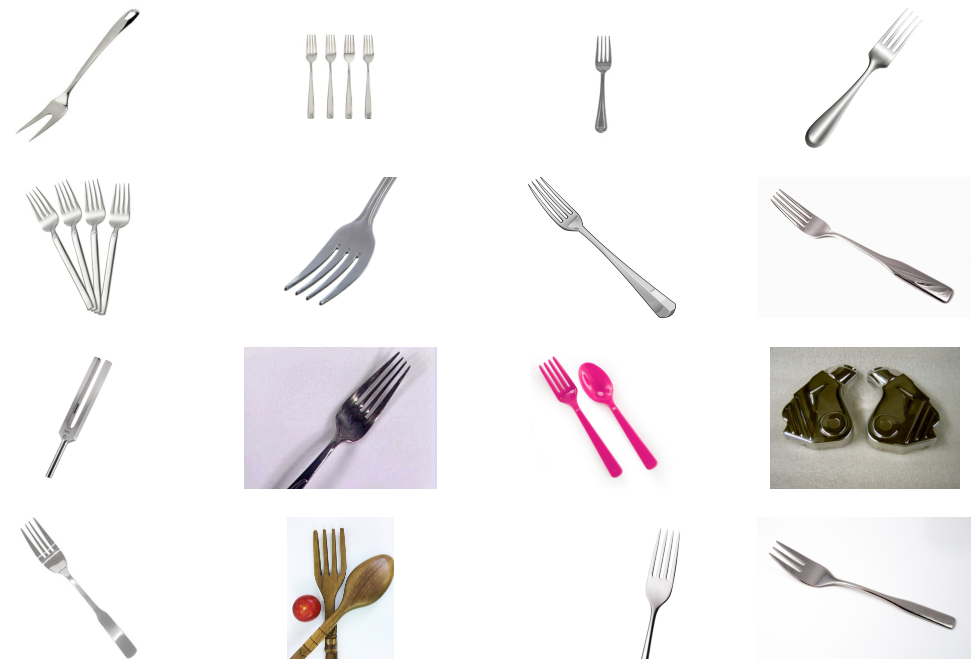

In [22]:
f, axes = plt.subplots(4, 4, figsize=(18,12))
axes = axes.flatten()
ax_i = 0
img_i = 0
while ax_i < len(axes) and img_i < len(urls):
  try:
    url = urls_forks[img_i]
    print(f'{img_i}: {url}')
    image_data = requests.get(url)
    image_data.raise_for_status()
    
    image = Image.open(BytesIO(image_data.content)) 
    axes[ax_i].imshow(image)
    axes[ax_i].axis("off")
    ax_i += 1 # next axis
  except requests.exceptions.RequestException as e:
    print(e)
  finally:
    img_i += 1 # next image, especially when exception occured

      
plt.show()

### 2.2 Get images for the two classes
Download 150 images of each class. Save images to Google drive.  
Remove any corrupt images using `verify_images()`.

In [23]:
export_path = Path('/content/gdrive/MyDrive/Colab Notebooks/')
export_path.ls()

(#1) [Path('/content/gdrive/MyDrive/Colab Notebooks/images')]

In [26]:
utensil_types = 'spoon','fork'
path = export_path/'utensils_ddg_2023'

In [37]:
if not path.exists():
    path.mkdir()
    for o in utensil_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} spoon')
        download_images(dest, urls=results)

In [38]:
if not path.exists():
    path.mkdir()
    for o in utensil_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} fork')
        download_images(dest, urls_forks=results)

In [45]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(path.unlink)

(#0) []

## 3. Setup image loaders
Setup image loaders, use 20% of images for validation, and show one batch for each training and validation dataset.

**Question 1:** How many images of each class are in trainging and validation sets?

*YOUR ANSWER HERE*

## 4. Setup vision learner
Setup a vision learner with the dataloaders, `resnet18` architecture and `error_rate` as metric.

## 5. Train binary classifier
Fine tune for 10 epochs and show results.

**Question 2:** Is the model overfitting? Why, why not?

*YOUR ANSWER HERE*

## 6. Analyze results

Plot confusion matrix.

Plot top 5 losses.


**Question 3:** How many false positive, false negative errors?

*YOUR ANSWER HERE*

## 7. Summary and Conclusion

Summarize:
- Type of classifier trained.
- Number of images of each class in the training validation sets
- Error rate achieved

*YOUR ANSWER HERE*

Conclusion:
- Are there any problems with data/labeling?
- Are you satisfied with model performance? Why, why not?

*YOUR ANSWER HERE*


## 8. Reflection
Include a sentence or two about 
- what you liked or disliked, 
- found interesting, confusing, challangeing, motivating 

while working on this assignment.

*YOUR ANSWER HERE*